Improvements:

1. Bokeh to generate dynamic graphs, even on the same graph.
2. More types of graphs to show

The average PM2.5 value in 2008 is 85.09 .


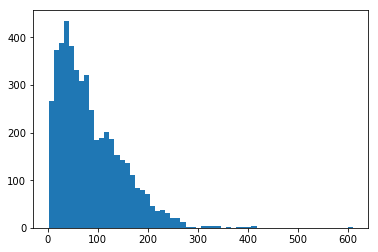

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

#08
for i in range(0,1):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2009 is 101.81 .


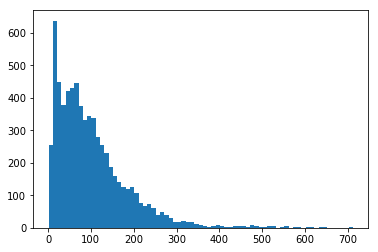

In [71]:
#09
for i in range(1,2):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2010 is 104.05 .


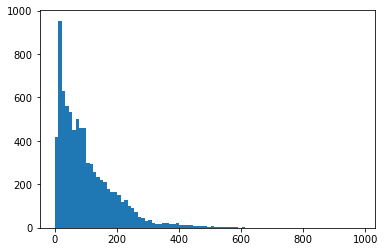

In [73]:
#10
for i in range(2,3):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2011 is 99.09 .


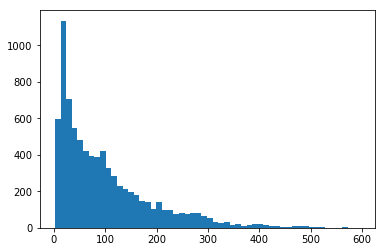

In [74]:
#11
for i in range(3,4):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2012 is 90.52 .


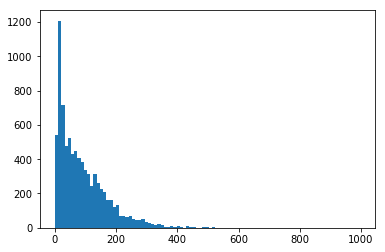

In [75]:
#12
for i in range(4,5):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2013 is 101.71 .


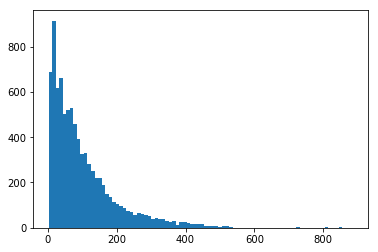

In [76]:
#13
for i in range(5,6):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2014 is 97.73 .


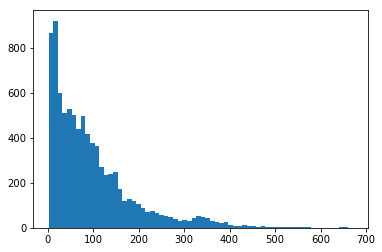

In [77]:
#14
for i in range(6,7):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2015 is 82.73 .


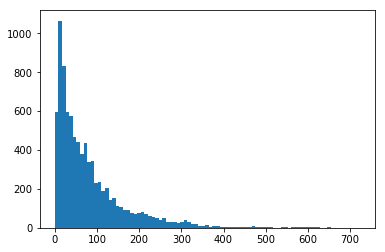

In [78]:
#15
for i in range(7,8):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2016 is 72.86 .


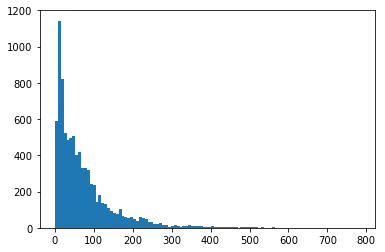

In [79]:
#16
for i in range(8,9):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")

The average PM2.5 value in 2017 is 70.13 .


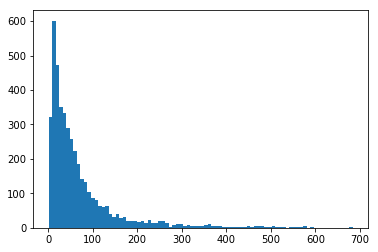

In [80]:
#17
for i in range(9,10):
    df08 = pd.read_csv("./Beijing_"+str(int(2008)+i)+".csv")
    s08 = df08['column9'].loc[4:].astype(str).astype(int)
    plt.hist(s08, bins = 'auto')
    
    print ("The average PM2.5 value in",str(int(2008)+i),"is",round(np.mean(df08['column9'].loc[4:].astype(str).astype(int)),2),".")